## Q1

So, we know as per the Bayes theorem that
$$P(\boldsymbol{\theta} \mid \mathbf{X}) \propto P(\mathbf{X} \mid \boldsymbol{\theta}) \cdot P(\boldsymbol{\theta})$$

Now we know that our likelihood function is:
$$P(X \mid n, \theta) = \binom{n}{x} \theta^x (1 - \theta)^{n - x}$$
which is a binomial distribution.

Our prior is a discretized prior following a uniform density function:
$$ \textbf{Prior} \quad
p(\theta)_{\text{Uniform}}^{\text{Discrete}} =
\begin{cases}
\frac{1}{101}, & \text{for } \theta = \frac{i}{100}, \text{ for } i = 0, 1, \dots, 100, \\
0, & \text{otherwise} \end{cases} $$

Hence, if we are to estimate the posterior distribution, the following would be its form:
$$P(\boldsymbol{\theta} \mid \mathbf{X}) \propto \theta^x (1 - \theta)^{n - x} \cdot \frac{1}{101} $$


Now since $\theta$ can only values from i = 1 to 100 for $\theta = \frac{i}{100}$ the distribution is modified in the following manner:

$$p\left(\frac{i}{100} \mid x, n\right) \propto \left(\frac{i}{100}\right)^x \left(1 - \frac{i}{100}\right)^{n - x} \cdot \frac{1}{101}$$

According to this, our posterior is still a binomial distribution with a scaling done by the value 1/101.
It's parametrization and form is the following:

$$ P(\boldsymbol{\theta} \mid \mathbf{X}) =\text{Binomial}(\frac{i}{100}, x, n) $$

## Q2

**Running the Bayesian multi-armed bandit**

In [10]:
#from scipy import stats
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np

In [9]:

theta_true = [0.4, 0.6]  # True probabilities of success for the two "arms"
alpha_prior = [1, 1]  # Prior alpha for Beta distribution for both arms
beta_prior = [1, 1]  # Prior beta for Beta distribution for both arms
num_trials = 100  # Total number of trials

# Initialize variables
alpha = np.array(alpha_prior)  # Posterior alpha values
beta = np.array(beta_prior)    # Posterior beta values
n_j = [0, 0]                   # Counts for each arm (number of times played)
x_j = [0, 0]     
for t in range(num_trials):
    # Sampling from the posterior distributions
    sampled_theta1 = np.random.beta(alpha[0], beta[0])
    sampled_theta2 = np.random.beta(alpha[1], beta[1])
    
    # Choosing the arm with the highest sampled value
    chosen_arm = np.argmax([sampled_theta1, sampled_theta2])
    
    # Simulating the outcome of pulling the chosen arm
    outcome = np.random.binomial(1, theta_true[chosen_arm])
    
    # Updating the posterior parameters for the chosen arm
    alpha[chosen_arm] += outcome
    beta[chosen_arm] += 1 - outcome
    
    # Updating counts
    n_j[chosen_arm] += 1
    x_j[chosen_arm] += outcome

    # Results
print("Final Posterior Parameters:")
print(f"Alpha: {alpha}")
print(f"Beta: {beta}")
print("Final Counts:")
print(f"n_j: {n_j} (number of times each arm was played)")
print(f"x_j: {x_j} (number of successes for each arm)")

# Identify the best arm
best_arm = np.argmax(alpha / (alpha + beta))
print(f"The best arm is Arm {best_arm + 1} which is theta 2.")



Final Posterior Parameters:
Alpha: [ 5 50]
Beta: [13 36]
Final Counts:
n_j: [16, 84] (number of times each arm was played)
x_j: [4, 49] (number of successes for each arm)
The best arm is Arm 2 which is theta 2.


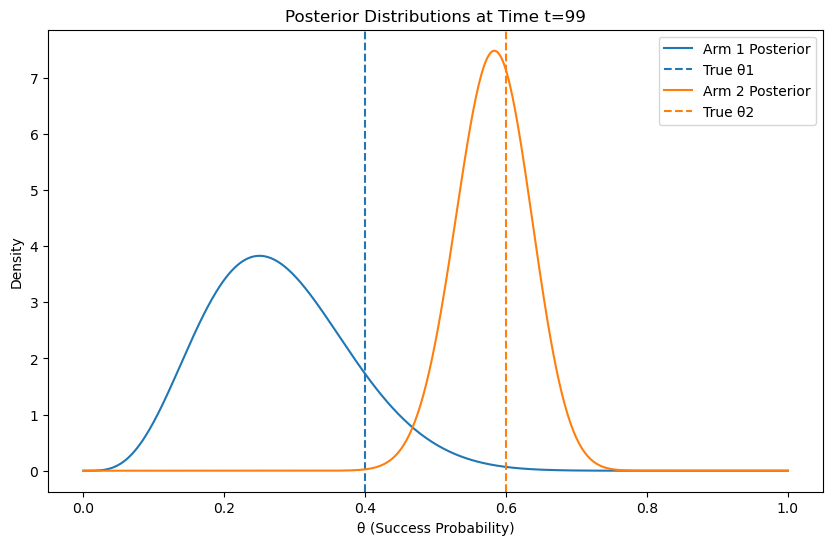

In [11]:
# Plotting final posterior distributions for the process

alpha = [alpha_prior[j] + x_j[j] for j in range(2)]
beta_params = [beta_prior[j] + n_j[j] - x_j[j] for j in range(2)]
plt.figure(figsize=(10, 6))
x = np.linspace(0, 1, 500)
for j in range(2):
    plt.plot(x, beta.pdf(x, alpha[j], beta_params[j]), label=f"Arm {j+1} Posterior")
    plt.axvline(theta_true[j], color=f"C{j}", linestyle="--", label=f"True θ{j+1}")
plt.title(f"Posterior Distributions at Time t={t}")
plt.xlabel("θ (Success Probability)")
plt.ylabel("Density")
plt.legend()
plt.show()

This plot depicts the final result of the algorithms, where we see the arm 2 posterior closely approximate the true probability, coming quite close to 0.6 around the range 0.5-0.6. Arm 1 posterior is at 0.25 which means it is still far from its true probability of 0.4. Thus, with more iterations the result would improve.

## Q3

In [8]:

# Analysis 1

true_theta = [0.2, 0.5, 0.3]  # True probabilities of success for the three "arms"

#for theta1 and theta2
theta_1_2 = [0.2,0.5]
alpha_prior = [1, 1]  # Prior alpha for Beta distribution for both arms
beta_prior = [1, 1]  # Prior beta for Beta distribution for both arms
num_trials = 100  # Total number of trials

# Initialize variables
alpha = np.array(alpha_prior)  # Posterior alpha values
beta = np.array(beta_prior)    # Posterior beta values
n_j = [0, 0]                   # Counts for each arm (number of times played)
x_j = [0, 0]     
for t in range(num_trials):
    # Sample from the posterior distributions
    sampled_theta1 = np.random.beta(alpha[0], beta[0])
    sampled_theta2 = np.random.beta(alpha[1], beta[1])
    
    # Choose the arm with the highest sampled value
    chosen_arm = np.argmax([sampled_theta1, sampled_theta2])
    
    # Simulate the outcome of pulling the chosen arm
    outcome = np.random.binomial(1, theta_1_2[chosen_arm])
    
    # Update posterior parameters for the chosen arm
    alpha[chosen_arm] += outcome
    beta[chosen_arm] += 1 - outcome
    
    # Update counts
    n_j[chosen_arm] += 1
    x_j[chosen_arm] += outcome

    # Results
print("Final Posterior Parameters:")
print(f"Alpha: {alpha}")
print(f"Beta: {beta}")
print("Final Counts:")
print(f"n_j: {n_j} (number of times each arm was played)")
print(f"x_j: {x_j} (number of successes for each arm)")






# Identify the best arm
best_arm = np.argmax(alpha / (alpha + beta))
print(f"The best arm is Arm {best_arm + 1} which is theta 2.")

Final Posterior Parameters:
Alpha: [ 1 49]
Beta: [ 6 48]
Final Counts:
n_j: [5, 95] (number of times each arm was played)
x_j: [0, 48] (number of successes for each arm)
The best arm is Arm 2 which is theta 2.


In [12]:
# For theta 1 and theta 3
theta_1_3 = [0.2,0.3]
alpha_prior = [1, 1]  # Prior alpha for Beta distribution for both arms
beta_prior = [1, 1]  # Prior beta for Beta distribution for both arms
num_trials = 100  # Total number of trials

# Initialize variables
alpha = np.array(alpha_prior)  # Posterior alpha values
beta = np.array(beta_prior)    # Posterior beta values
n_j = [0, 0]                   # Counts for each arm (number of times played)
x_j = [0, 0]     
for t in range(num_trials):
    # Sample from the posterior distributions
    sampled_theta1 = np.random.beta(alpha[0], beta[0])
    sampled_theta2 = np.random.beta(alpha[1], beta[1])
    
    # Choose the arm with the highest sampled value
    chosen_arm = np.argmax([sampled_theta1, sampled_theta2])
    
    # Simulate the outcome of pulling the chosen arm
    outcome = np.random.binomial(1, theta_1_3[chosen_arm])
    
    # Update posterior parameters for the chosen arm
    alpha[chosen_arm] += outcome
    beta[chosen_arm] += 1 - outcome
    
    # Update counts
    n_j[chosen_arm] += 1
    x_j[chosen_arm] += outcome

    # Results
print("Final Posterior Parameters:")
print(f"Alpha: {alpha}")
print(f"Beta: {beta}")
print("Final Counts:")
print(f"n_j: {n_j} (number of times each arm was played)")
print(f"x_j: {x_j} (number of successes for each arm)")





# Identify the best arm
best_arm = np.argmax(alpha / (alpha + beta))
print(f"The best arm is Arm {best_arm + 1} which is theta 3.")

Final Posterior Parameters:
Alpha: [13 12]
Beta: [45 34]
Final Counts:
n_j: [56, 44] (number of times each arm was played)
x_j: [12, 11] (number of successes for each arm)
The best arm is Arm 2 which is theta 3.


In [13]:
# for theta 2 and theta 3
theta_2_3 = [0.5,0.3]
alpha_prior = [1, 1]  # Prior alpha for Beta distribution for both arms
beta_prior = [1, 1]  # Prior beta for Beta distribution for both arms
num_trials = 100  # Total number of trials

# Initialize variables
alpha = np.array(alpha_prior)  # Posterior alpha values
beta = np.array(beta_prior)    # Posterior beta values
n_j = [0, 0]                   # Counts for each arm (number of times played)
x_j = [0, 0]     
for t in range(num_trials):
    # Sample from the posterior distributions
    sampled_theta1 = np.random.beta(alpha[0], beta[0])
    sampled_theta2 = np.random.beta(alpha[1], beta[1])
    
    # Choose the arm with the highest sampled value
    chosen_arm = np.argmax([sampled_theta1, sampled_theta2])
    
    # Simulate the outcome of pulling the chosen arm
    outcome = np.random.binomial(1, theta_2_3[chosen_arm])
    
    # Update posterior parameters for the chosen arm
    alpha[chosen_arm] += outcome
    beta[chosen_arm] += 1 - outcome
    
    # Update counts
    n_j[chosen_arm] += 1
    x_j[chosen_arm] += outcome

    # Results
print("Final Posterior Parameters:")
print(f"Alpha: {alpha}")
print(f"Beta: {beta}")
print("Final Counts:")
print(f"n_j: {n_j} (number of times each arm was played)")
print(f"x_j: {x_j} (number of successes for each arm)")




# Identify the best arm
best_arm = np.argmax(alpha / (alpha + beta))
print(f"The best arm is Arm {best_arm + 1} which is theta 2.")

Final Posterior Parameters:
Alpha: [37 16]
Beta: [35 16]
Final Counts:
n_j: [70, 30] (number of times each arm was played)
x_j: [36, 15] (number of successes for each arm)
The best arm is Arm 1 which is theta 2.


In [14]:
# Analysis 2: Using Dirichlet-multinomial


# Prior parameters for the Dirichlet distribution (initial belief)
alpha_prior = [1, 1, 1]  # Prior alpha values for the three arms

# Total number of trials
num_trials = 100

# Initialize posterior parameters (Dirichlet alpha values)
alpha = np.array(alpha_prior)

# Counts for each arm
n_j = np.zeros(3, dtype=int)  # Number of times each arm is played
x_j = np.zeros(3, dtype=int)  # Success counts for each arm

# Perform trials
for t in range(num_trials):
    # Sample probabilities from the Dirichlet posterior
    sampled_theta = np.random.dirichlet(alpha)
    
    # Choose the arm with the highest sampled probability
    chosen_arm = np.argmax(sampled_theta)
    
    # Simulate the outcome of pulling the chosen arm
    outcome = np.random.multinomial(1, true_theta)  # Multinomial outcome (one-hot encoded)
    outcome_idx = np.argmax(outcome)  # Get the index of the actual outcome
    
    # Update posterior parameters for the chosen arm
    alpha[outcome_idx] += 1  # Update Dirichlet parameters for the observed outcome
    
    # Update counts
    n_j[chosen_arm] += 1
    x_j[outcome_idx] += 1

# Results
print("Final Posterior Parameters (Dirichlet alpha):")
print(f"Alpha: {alpha}")
print("\nCounts:")
print(f"n_j: {n_j} (number of times each arm was chosen)")
print(f"x_j: {x_j} (number of times each outcome occurred)")


# Identify the best arm
best_arm = np.argmax(alpha / np.sum(alpha))  # Normalize the posterior means
print(f"\nThe best arm is Arm {best_arm + 1} or theta 2.")

Final Posterior Parameters (Dirichlet alpha):
Alpha: [21 54 28]

Counts:
n_j: [ 9 84  7] (number of times each arm was chosen)
x_j: [20 53 27] (number of times each outcome occurred)

The best arm is Arm 2 or theta 2.


When looking at analysis 1 and 2, both approaches yield the same answer that $\theta_2$ is greater than the other two arms. However, this is if our objective is to do get a global understanding of the parameters i.e understand the highest parameter within a grid of parameters. The following are cases where our approach would change:

- objective is to do local comparison of parameters

If I want to understand the relationship between $\theta_1$ and $\theta_2$ specifically, the beta-binomial pairwise approach allows me to do this. The wholistic dirichlet-multinomial approach does not allow for local comparison.


- size of parameter grid

if I want to check specific local comparisons of parameters, the beta-binomial approach works. However, if I want to do a pairwise comparison of 10 parameters even, the pairwise approach would be computationally expensive. Thus, for many parameters if our objective is to get a big picture understanding of the most likely outcome we should use the Dirichlet-Multinomial approach.


- independent events

If we are analyzing the parameters of independent events (like flipping two separate coins) and our focus is local comparison, then we can use the Beta-Binomial approach. If there is some dependency structure where the probabilities  of the event set must sum up to 1, we cannot use beta-binomial because the subset of two parameters probabilities will not sum up to 1 giving us the wrong picture. In this case, a dirichlet-multinomial approach is better.

A potential application in A/B testing is this:

Imagine a company has wishes to do email marketing with two email templates in the pipeline, template A and B. They wish to understand which design maximizes the click rate on a link to their website . To do this, a multi-armed bandit approach can be used. They can assign a uniform beta prior for both designs. Then, by randomly sampling from the prior, and selecting the template that had a higher probability of being clicked on, the company can observe whether or not a customer has actually clicked on the link. This acts as a feedback loop and the data is factored into the parameters for the posterior. 

Like this, the company can decide which email template to use depending on real-time information on which template has a higher realized probability of clicking.